In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("songs.xlsx")
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


In [3]:
df.shape

(19345, 14)

# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


In [5]:
# Step 1: Remove unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
# Step 2: Check missing values
missing_values = df.isnull().sum()
missing_values

video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [7]:
# Step 3: convert Datatype, convert 'Published At' to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       19345 non-null  object             
 1   channelTitle   19345 non-null  object             
 2   title          19345 non-null  object             
 3   description    19342 non-null  object             
 4   tags           19345 non-null  object             
 5   publishedAt    19345 non-null  datetime64[ns, UTC]
 6   viewCount      19345 non-null  int64              
 7   likeCount      19345 non-null  int64              
 8   favoriteCount  19345 non-null  int64              
 9   commentCount   19345 non-null  int64              
 10  duration       19345 non-null  object             
 11  definition     19345 non-null  object             
 12  caption        19345 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), 

In [9]:
# Check for missing values again after conversion
missing_values_after_conversion = df.isnull().sum()

In [10]:
# Display the missing values before and after conversion
missing_values, missing_values_after_conversion

(video_id         0
 channelTitle     0
 title            0
 description      3
 tags             0
 publishedAt      0
 viewCount        0
 likeCount        0
 favoriteCount    0
 commentCount     0
 duration         0
 definition       0
 caption          0
 dtype: int64,
 video_id         0
 channelTitle     0
 title            0
 description      3
 tags             0
 publishedAt      0
 viewCount        0
 likeCount        0
 favoriteCount    0
 commentCount     0
 duration         0
 definition       0
 caption          0
 dtype: int64)

In [11]:
# Step 4: Handle missing values by filling with a placeholder
df['description'].fillna('No description', inplace=True)

In [12]:
df.isnull().sum()

video_id         0
channelTitle     0
title            0
description      0
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [13]:
# Step 5: Handling Outliers using IQR Method

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q1 + 1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [14]:
# Applying outlier handing functions to numerical columns

df_clean = handle_outliers(df, 'viewCount')
df_clean = handle_outliers(df, 'likeCount')
df_clean = handle_outliers(df, 'favoriteCount')
df_clean = handle_outliers(df, 'commentCount')

In [15]:
# Display the cleaned dataframe

df_clean.head(), df_clean.shape

(      video_id channelTitle  \
 0  F44TK5EHCRo     T-Series   
 1  adx8Rsjp-c0     T-Series   
 2  36nQLyrR7Sw     T-Series   
 3  TKbifi5AMQo     T-Series   
 4  NNA21SoGqss     T-Series   
 
                                                title  \
 0  RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...   
 1  TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...   
 2  ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...   
 3  HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...   
 4  Har Har Mahadev (Lyrical Video): Sachet Tandon...   
 
                                          description  \
 0  Presenting the song "RAFTA RAFTA (Lo-Fi Mix)" ...   
 1  Presenting the song "TUM HO MERA PYAR (Lo-Fi M...   
 2  Presenting the song "ISHQ HOTHON SE (Lo-Fi Mix...   
 3  Presenting the song "HUMKO PYAR HUA (Lo-Fi Mix...   
 4  T-Series Presents "Har Har Mahadev (Lyrical Vi...   
 
                                                 tags  \
 0  ['hindi songs 2023', 'hindi songs new', 'bolly...   
 1  

# EDA of the Data

In [16]:
# Descriptive Statistics

descriptive_stats = df_clean[['viewCount', 'likeCount',
                             'commentCount']].describe()
print(descriptive_stats)

          viewCount      likeCount  commentCount
count  1.548700e+04   15487.000000  15487.000000
mean   1.058283e+06    8420.201266    250.285659
std    3.309072e+06   22049.836072    328.281703
min    0.000000e+00       0.000000      0.000000
25%    5.496050e+04     429.000000     26.000000
50%    2.090620e+05    1949.000000     97.000000
75%    7.802615e+05    8041.000000    347.000000
max    1.652652e+08  751272.000000   1423.000000


# Distributions

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

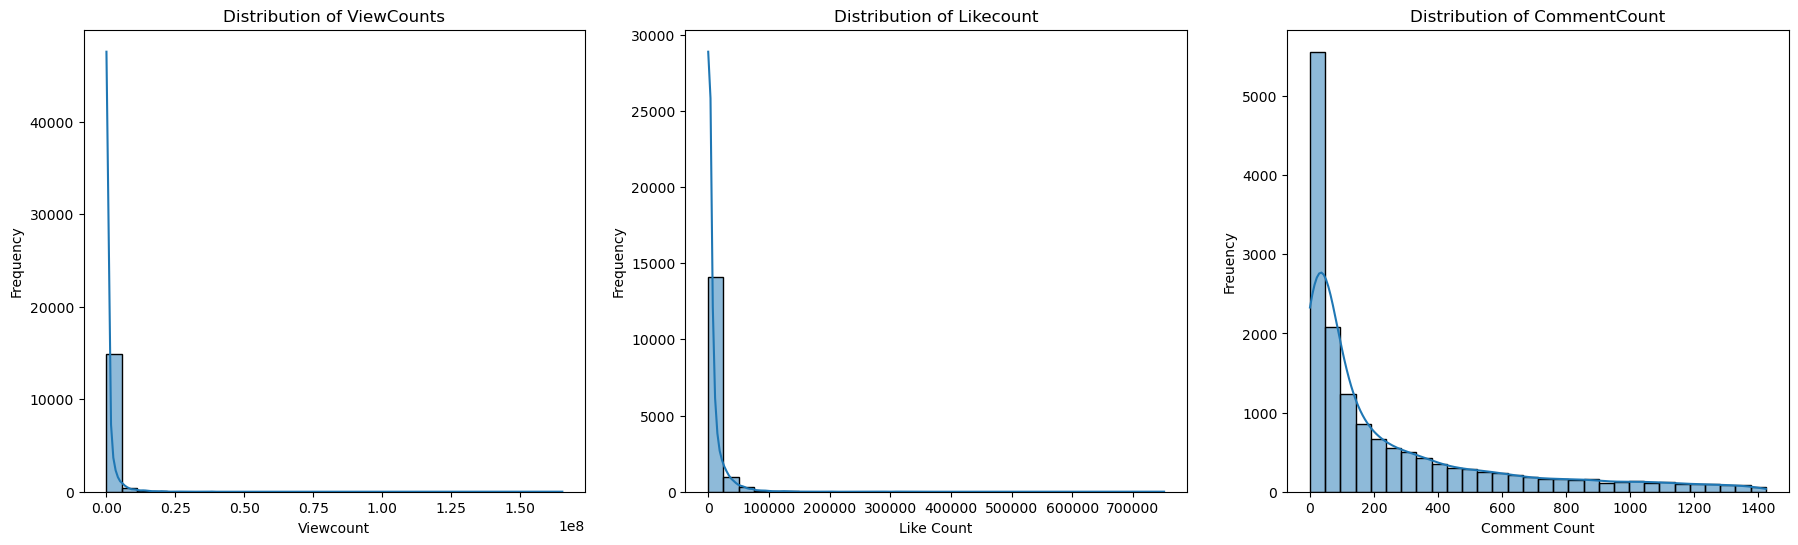

In [18]:
plt.figure(figsize=(22,6))

# Distribution of viewCount
plt.subplot(1,3,1)
sns.histplot(df_clean['viewCount'], bins = 30, kde = True)
plt.title("Distribution of ViewCounts")
plt.xlabel('Viewcount')
plt.ylabel('Frequency')

# Distribution of LikeCount
plt.subplot(1,3,2)
sns.histplot(df_clean['likeCount'], bins = 30, kde = True)
plt.title('Distribution of Likecount')
plt.xlabel('Like Count')
plt.ylabel('Frequency')

# Distribution of commentCount
plt.subplot(1,3,3)
sns.histplot(df_clean['commentCount'], bins=30, kde=True)
plt.title("Distribution of CommentCount")
plt.xlabel('Comment Count')
plt.ylabel('Freuency')

plt.show()

# Relationships

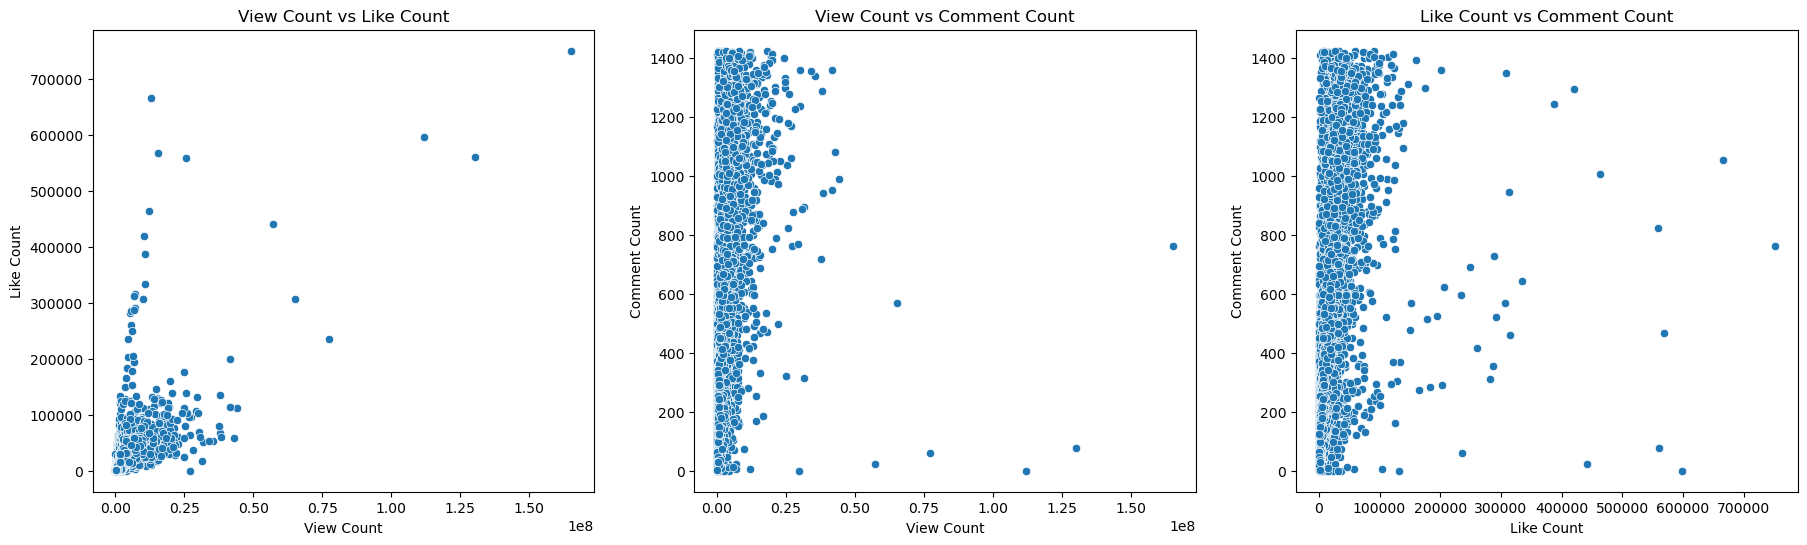

In [19]:
plt.figure(figsize=(22, 6))

# Relationship between viewCount and likeCount
plt.subplot(1, 3, 1)
sns.scatterplot(x =df_clean['viewCount'], y = df_clean['likeCount'])
plt.title('View Count vs Like Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')

# Relationship between viewCount and commentCount
plt.subplot(1, 3, 2)
sns.scatterplot(x = df_clean['viewCount'], y = df_clean['commentCount'])
plt.title('View Count vs Comment Count')
plt.xlabel('View Count')
plt.ylabel('Comment Count')

# Relationship between likeCount and commentCount
plt.subplot(1, 3, 3)
sns.scatterplot(x = df_clean['likeCount'], y = df_clean['commentCount'])
plt.title('Like Count vs Comment Count')
plt.xlabel('Like Count')
plt.ylabel('Comment Count')

plt.show()

# Trends over Time

In [20]:
# Extract month and year from publishedAt
df_clean['year_month'] = df_clean['publishedAt'].dt.to_period('M')

# Aggregate data by month
monthly_stats = df_clean.groupby('year_month')[['viewCount',
                                               'likeCount',
                                               'commentCount']].sum()
print(monthly_stats)

            viewCount  likeCount  commentCount
year_month                                    
2010-12       1662209      29257            73
2011-01       2591458       7973           127
2011-02      91594620     649517          2561
2011-03      40270799     219698          4437
2011-04     197413328    1151641         32068
...               ...        ...           ...
2023-04      60863121     944246         26427
2023-05      28764618     842000         18012
2023-06      49103061    1270089         31083
2023-07      43073468     768914         22293
2023-08      16909456     449949         11781

[152 rows x 3 columns]


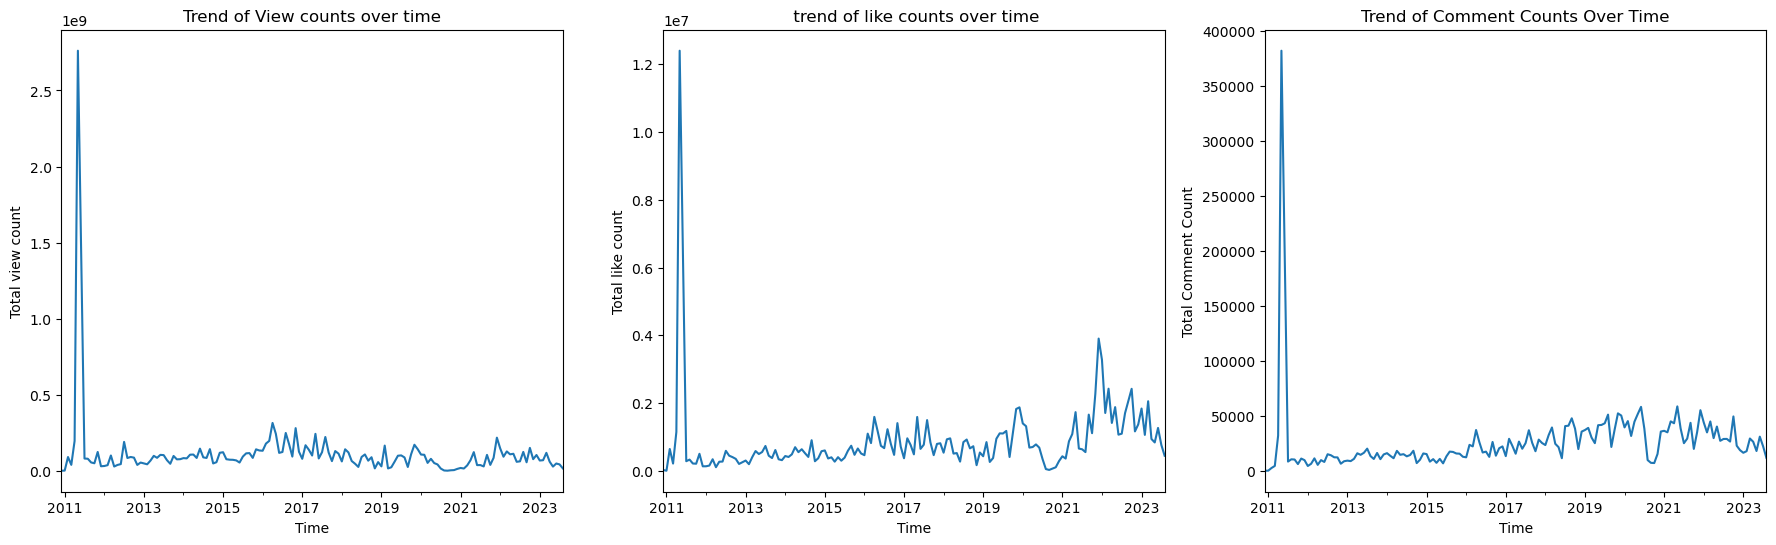

In [21]:
# Plotting trends over time

plt.figure(figsize=(22,6))

# Trend of viewCount over time
plt.subplot(1,3,1)
monthly_stats['viewCount'].plot()
plt.title('Trend of View counts over time')
plt.xlabel('Time')
plt.ylabel('Total view count')

# trend of like count over time
plt.subplot(1,3,2)
monthly_stats['likeCount'].plot()
plt.title(' trend of like counts over time')
plt.xlabel('Time')
plt.ylabel('Total like count')

# Trend of commentCount over time
plt.subplot(1, 3, 3)
monthly_stats['commentCount'].plot()
plt.title('Trend of Comment Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Total Comment Count')

plt.show()

# Content and Channel Analysis
# Distribution of Videos Across Channels

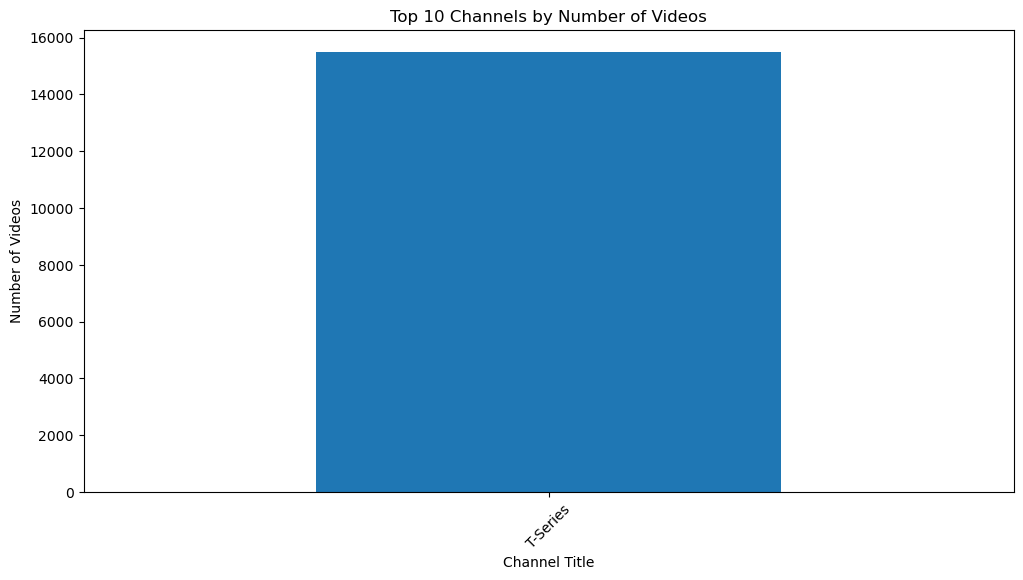

In [22]:
# Count the number of videos per channel
channel_video_count = df_clean['channelTitle'].value_counts()

# Display the top 10 channels with the most videos
top_channels = channel_video_count.head(10)

# Plot the distribution of videos across the top 10 channels
plt.figure(figsize=(12, 6))
top_channels.plot(kind='bar')
plt.title('Top 10 Channels by Number of Videos')
plt.xlabel('Channel Title')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

# Popular Tags and Their Correlation with View Counts

In [23]:
from collections import Counter
from itertools import chain

# Extract tags from the dataset
all_tags = df_clean['tags'].apply(eval).tolist()
all_tags_flat = list(chain.from_iterable(all_tags))

# Count the occurrence of each tag
tag_counts = Counter(all_tags_flat)

# Display the top 10 most common tags
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Count'])
print(top_tags)

               Tag  Count
0          tseries   8955
1      hindi songs   8296
2  bollywood songs   6403
3            songs   5182
4    tseries songs   4968
5       film songs   4520
6        new songs   3991
7     latest songs   3692
8      movie songs   3345
9   t-series music   3258


# Analyze the relationship between tags and view counts

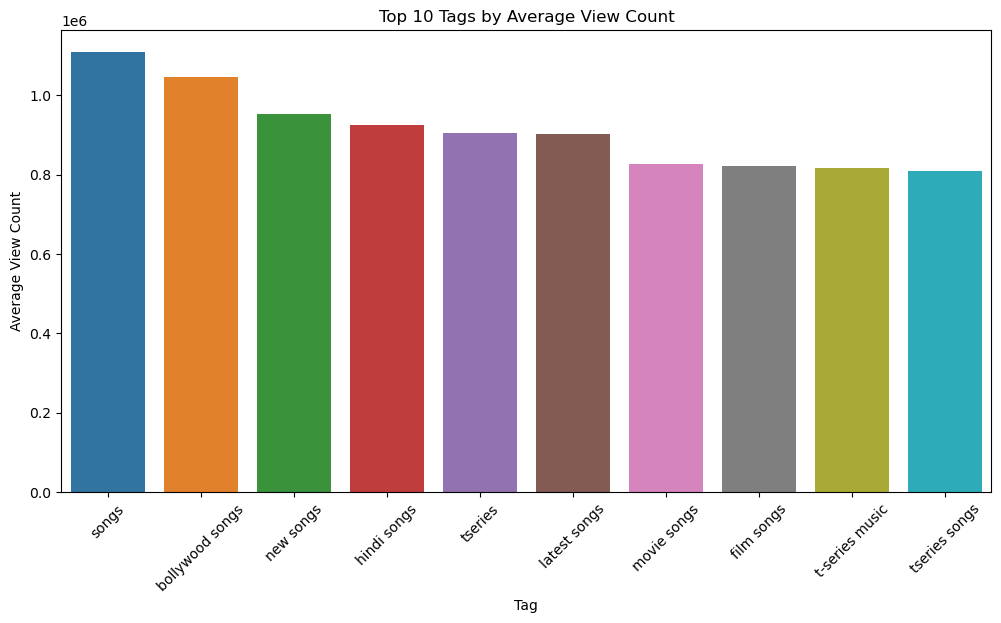

In [24]:
from collections import defaultdict

# Initialize a dictionary to hold view counts for each tag
tag_view_counts = defaultdict(list)

# Populate the dictionary with view counts
for index, row in df_clean.iterrows():
    tags = eval(row['tags'])
    view_count = row['viewCount']
    for tag in tags:
        tag_view_counts[tag].append(view_count)

# Calculate average view counts for each tag
tag_avg_view_counts = {tag: np.mean(view_counts) for tag,
                       view_counts in tag_view_counts.items()}

# Convert to a DataFrame for easier handling
tag_view_df = pd.DataFrame.from_dict(tag_avg_view_counts,
                                     orient='index',
                                     columns=['AverageViewCount'])

# Merge with tag counts to find the most popular tags and their average view counts
tag_view_df['Count'] = tag_view_df.index.map(tag_counts.get)
popular_tag_views = tag_view_df.nlargest(10, 'Count')

# Plot the top 10 tags by average view count
popular_tag_views = popular_tag_views.sort_values('AverageViewCount',
                                                  ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_tag_views.index, y=popular_tag_views['AverageViewCount'])
plt.title('Top 10 Tags by Average View Count')
plt.xlabel('Tag')
plt.ylabel('Average View Count')
plt.xticks(rotation=45)
plt.show()

# Analyze Temporal Trends in Metrics

In [25]:
# Extract year, month, day, day of the week and hour from the publishedAt columns

df_clean['year'] = df_clean['publishedAt'].dt.year
df_clean['month'] = df_clean['publishedAt'].dt.month
df_clean['day'] = df_clean['publishedAt'].dt.day
df_clean['day_of_week'] = df_clean['publishedAt'].dt.dayofweek
df_clean['hour'] = df_clean['publishedAt'].dt.hour

In [26]:
# Aggregate by year and Month
yearly_matrics = df_clean.groupby('year')[['viewCount',
                                          'likeCount',
                                          'commentCount']].sum()
monthly_metrics = df_clean.groupby('month')[['viewCount',
                                            'likeCount',
                                             'commentCount']].sum()
# Aggregate by day pf the week
day_of_the_week_metrics = df_clean.groupby('day_of_week')[['viewCount',
                                                          'likeCount',
                                                          'commentCount']].sum()
# Aggregate by hour of the day
hourly_metrics = df_clean.groupby('hour')[['viewCount',
                                        'likeCount',
                                        'commentCount']].sum()

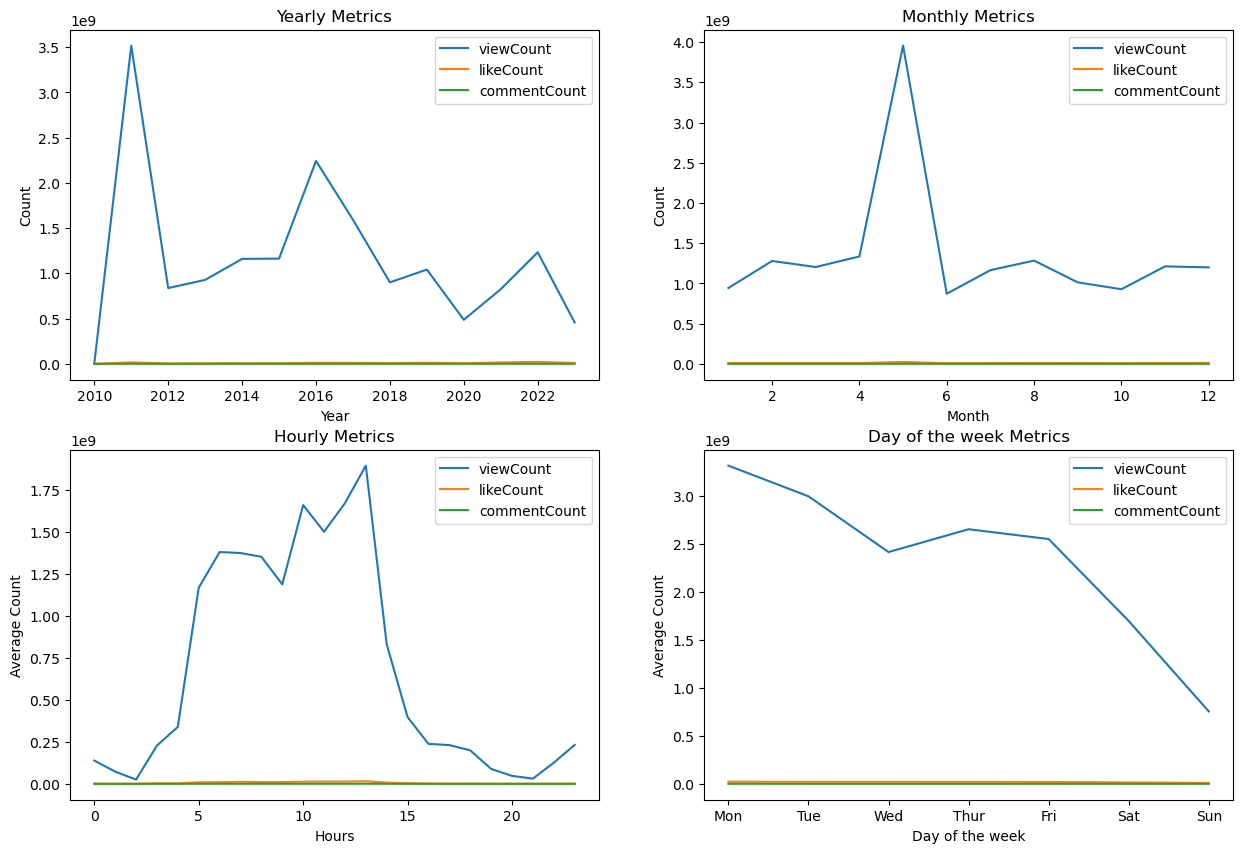

In [27]:
# Plotting the trends
plt.figure(figsize=(15,10))

# Yearly metrics
plt.subplot(2,2,1)
yearly_matrics.plot(ax = plt.gca())
plt.title('Yearly Metrics')
plt.xlabel('Year')
plt.ylabel('Count')

# Monthly metrics
plt.subplot(2, 2, 2)
monthly_metrics.plot(ax=plt.gca())
plt.title('Monthly Metrics')
plt.xlabel('Month')
plt.ylabel('Count')

# Hourly Metrics
plt.subplot(2,2,3)
hourly_metrics.plot(ax = plt.gca())
plt.title('Hourly Metrics')
plt.xlabel('Hours')
plt.ylabel('Average Count')

# Day of the week metrics
plt.subplot(2,2,4)
day_of_the_week_metrics.plot(ax = plt.gca())
plt.title('Day of the week Metrics')
plt.xlabel('Day of the week')
plt.ylabel('Average Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri',
          'Sat', 'Sun'])

plt.show()

# Identify Peak Publishing Times

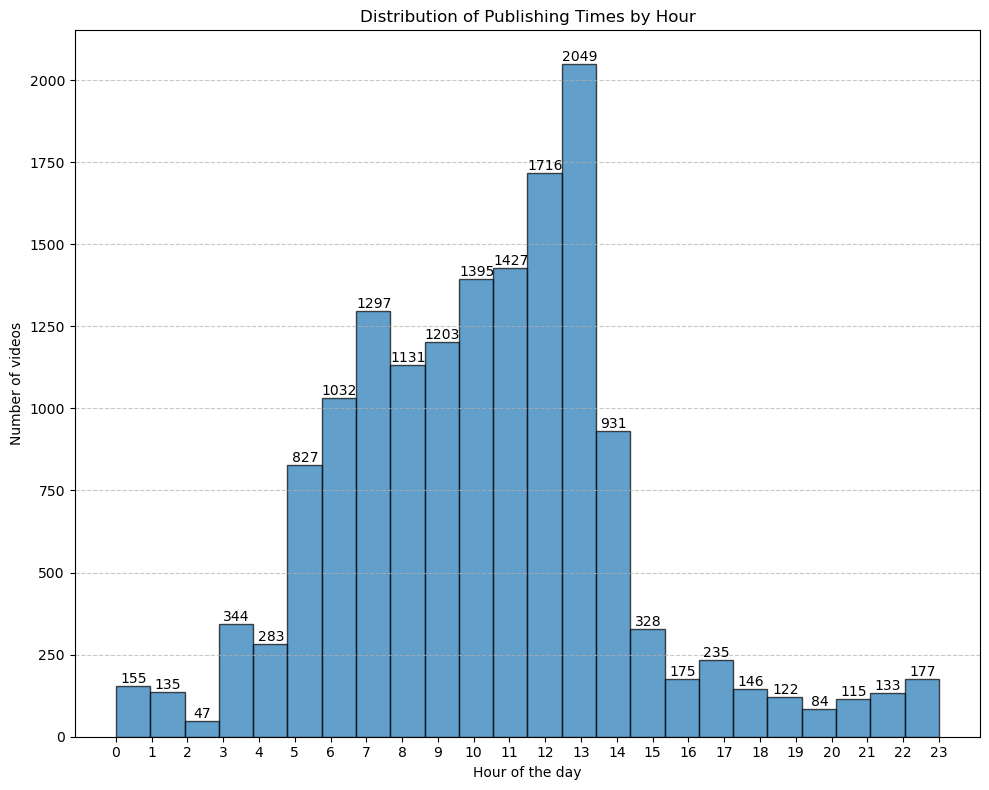

In [28]:
# Analyze the Distribution of Publishing Times
# Plot the distribution of Publishing times by Hours

plt.figure(figsize=(10, 8))
hist_data = plt.hist(df_clean['hour'], bins=24, edgecolor='black', alpha=0.7)

# Add data labels
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i] + 0.5,
             hist_data[0][i], str(int(hist_data[0][i])),
             ha='center', va='bottom')

plt.title('Distribution of Publishing Times by Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of videos')
plt.tight_layout()
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1600x800 with 0 Axes>

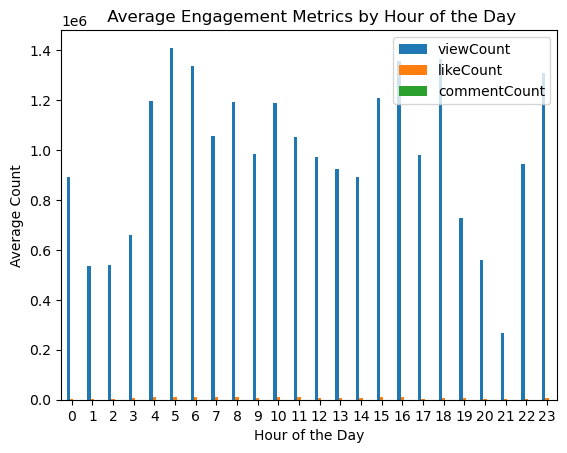

In [29]:
# Compare Engagement Metrics for Different Publishing Times

hourly_engagement = df_clean.groupby('hour')[['viewCount',
                                              'likeCount',
                                               'commentCount']].mean()
plt.figure(figsize=(16,8))
hourly_engagement.plot(kind = 'bar')
plt.title(' Average Engagement Metrics by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(rotation = 0)
plt.show()

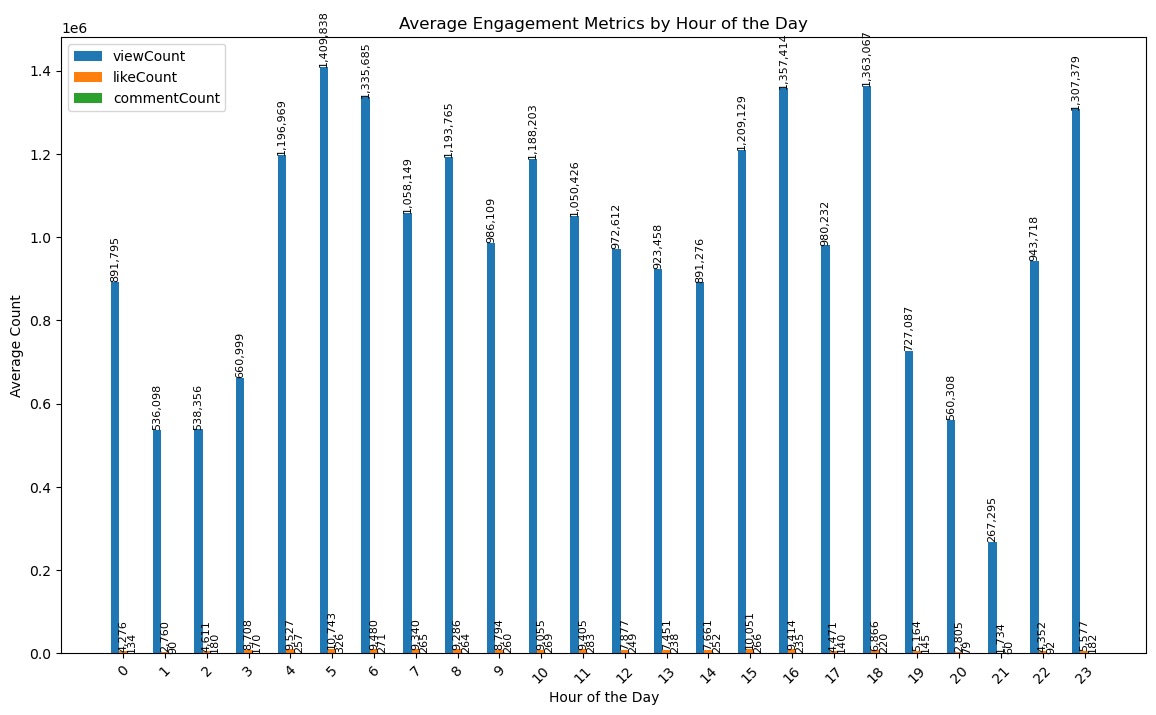

In [30]:
# Calculate average engagement metrics by hour
average_engagement =  df_clean.groupby('hour')[['viewCount',
                                              'likeCount',
                                               'commentCount']].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(average_engagement))

bar1 = ax.bar(index, average_engagement['viewCount'], bar_width, label='viewCount')
bar2 = ax.bar(index + bar_width, average_engagement['likeCount'], bar_width, label='likeCount')
bar3 = ax.bar(index + 2 * bar_width, average_engagement['commentCount'], bar_width, label='commentCount')

# Add data labels
def add_labels(bars, label_format='{:,.0f}'):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, label_format.format(height),
                ha='center', va='bottom', fontsize=8, rotation=90)

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Rotate x-axis labels for better readability
plt.xticks(index + bar_width, average_engagement.index, rotation=45)

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Count')
ax.set_title('Average Engagement Metrics by Hour of the Day')
ax.legend()

plt.show()

# User Engagement Insights

# Investigate Relationships between Likes, Comments, and Views
# Calculate Co-relation Coefficients

In [31]:
# Calculating Co-relation Matrix
correlation_matrix = df_clean[['viewCount','likeCount',
                              'commentCount']].corr()

# Displaying the correlation Matrix
print(correlation_matrix)

              viewCount  likeCount  commentCount
viewCount      1.000000   0.708675      0.413581
likeCount      0.708675   1.000000      0.494148
commentCount   0.413581   0.494148      1.000000


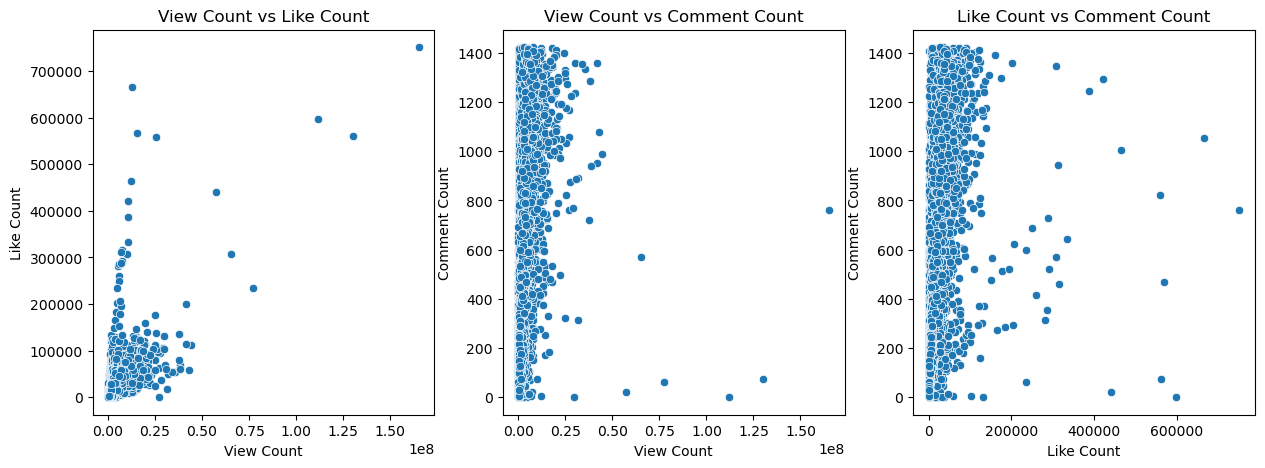

In [32]:
# Visulizing Relationships

# Scatter plots to visualize relationships
plt.figure(figsize=(15, 5))

# View Count vs Like Count
plt.subplot(1, 3, 1)
sns.scatterplot(x='viewCount', y='likeCount', data = df_clean)
plt.title('View Count vs Like Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')

# View Count vs Comment Count
plt.subplot(1, 3, 2)
sns.scatterplot(x='viewCount', y='commentCount', data = df_clean)
plt.title('View Count vs Comment Count')
plt.xlabel('View Count')
plt.ylabel('Comment Count')

# Like Count vs Comment Count
plt.subplot(1, 3, 3)
sns.scatterplot(x='likeCount', y='commentCount', data = df_clean)
plt.title('Like Count vs Comment Count')
plt.xlabel('Like Count')
plt.ylabel('Comment Count')

plt.show()

# Identify Factors Influencing User Engagement
# Analyze Impact of Video Characteristics 

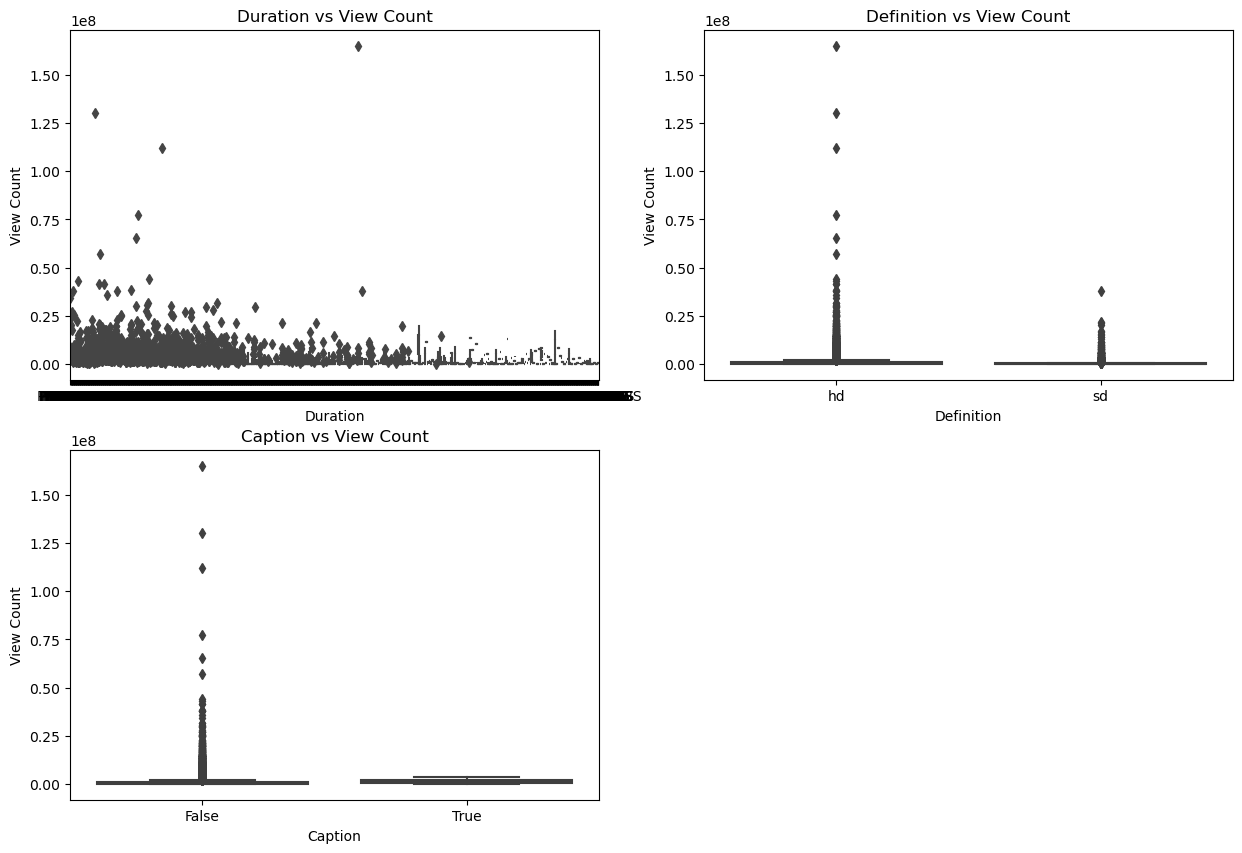

In [33]:
# Boxplots to visualize impact of video characteristics on engagement metrics

plt.figure(figsize=(15, 10))

# Duration vs View Count
plt.subplot(2, 2, 1)
sns.boxplot(x='duration', y='viewCount', data = df_clean)
plt.title('Duration vs View Count')
plt.xlabel('Duration')
plt.ylabel('View Count')

# Definition vs View Count
plt.subplot(2, 2, 2)
sns.boxplot(x='definition', y='viewCount', data = df_clean)
plt.title('Definition vs View Count')
plt.xlabel('Definition')
plt.ylabel('View Count')

# Caption vs View Count
plt.subplot(2, 2, 3)
sns.boxplot(x='caption', y='viewCount', data = df_clean)
plt.title('Caption vs View Count')
plt.xlabel('Caption')
plt.ylabel('View Count')

plt.show()